In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
# Loadin the dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
# Dataset
print('Training data shape : ', X_train.shape, y_train.shape)
print('Testing data shape : ', X_test.shape, y_test.shape)

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [4]:
num_classes = 10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

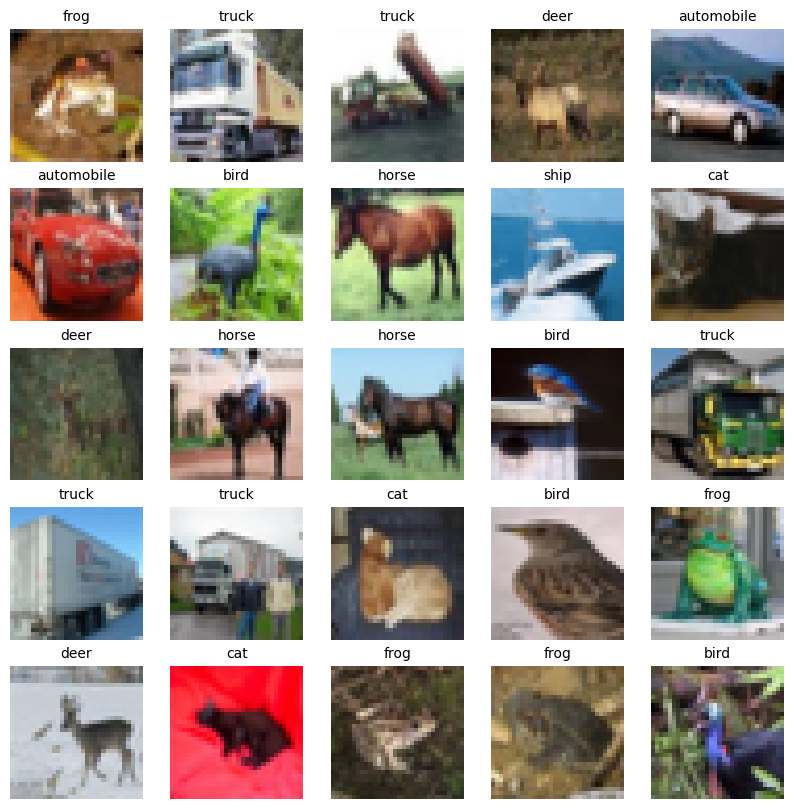

In [5]:
# Displaying few images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(class_names[y_train[i][0]], fontsize=10)
plt.show()

In [6]:
# Normalizing the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
print('Training data shape : ', X_train.shape, y_train.shape)
print('Testing data shape : ', X_test.shape, y_test.shape)

Training data shape :  (50000, 32, 32, 3) (50000, 10)
Testing data shape :  (10000, 32, 32, 3) (10000, 10)


In [9]:
# Building the model
model = keras.models.Sequential([
    # CNN layers
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), name='conv1'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), name='pool1'),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name='conv2'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), name='pool2'),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name='conv3'),

    # Dense layers
    keras.layers.Flatten(name='flatten'),
    keras.layers.Dense(64, activation='relu', name='dense1'),
    keras.layers.Dense(10, activation='softmax', name='dense2')
])

# Compiling the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Training the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.1819 - loss: 2.1899 - val_accuracy: 0.3125 - val_loss: 1.8915
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.3631 - loss: 1.7712 - val_accuracy: 0.4388 - val_loss: 1.5510
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.4459 - loss: 1.5282 - val_accuracy: 0.4490 - val_loss: 1.5030
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5018 - loss: 1.4096 - val_accuracy: 0.5083 - val_loss: 1.3654
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5302 - loss: 1.3158 - val_accuracy: 0.5321 - val_loss: 1.3279
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.5596 - loss: 1.2463 - val_accuracy: 0.5700 - val_loss: 1.2111
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5857 - loss: 1.1650 - val_accuracy: 0.5870 - val_loss: 1.1819
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6182 -

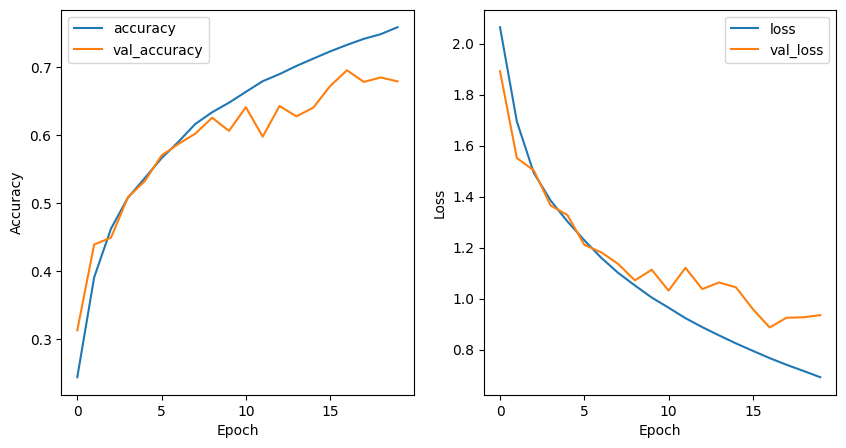

In [12]:
# Plotting the accuracy and loss
plt.figure(figsize=(10, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [13]:
# Evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6805 - loss: 0.9232


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


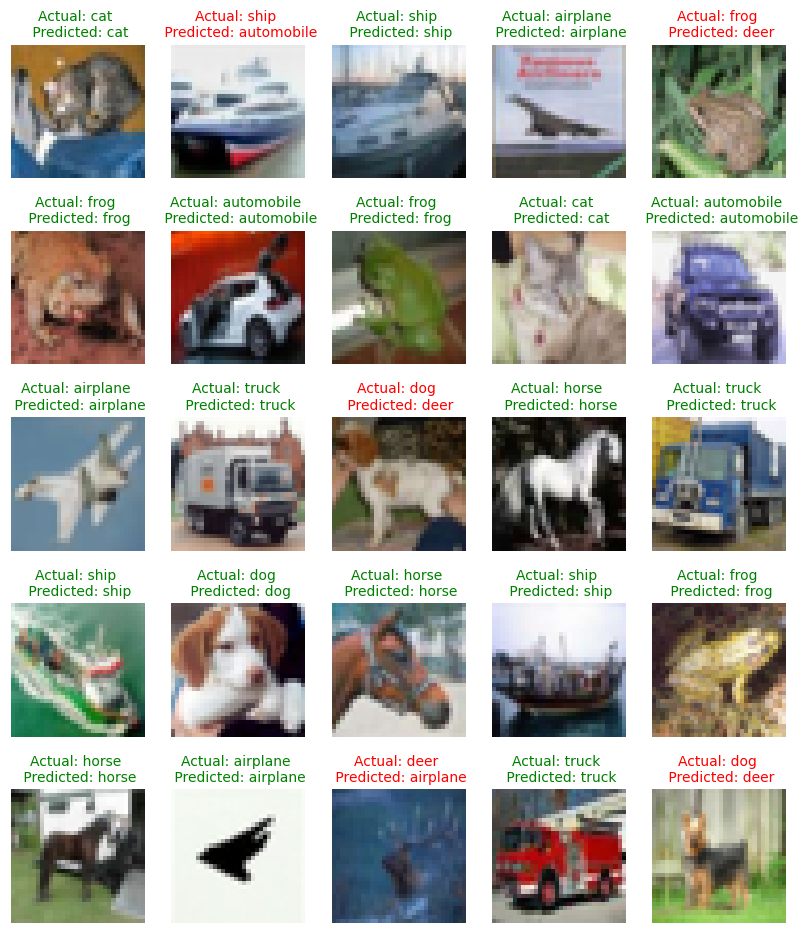

In [14]:
# Predictions
predictions = model.predict(X_test)

# Displaying few images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(f'Actual: {class_names[np.argmax(y_test[i])]} \n Predicted: {class_names[np.argmax(predictions[i])]}', fontsize=10, color='green' if np.argmax(y_test[i]) == np.argmax(predictions[i]) else 'red')
    plt.subplots_adjust(top=1.01)
plt.show()